In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
cls = ['P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P',
        'N', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'N']
score = [0.9, 0.8, 0.7, 0.6, 0.55, 0.51, 0.49, 0.43, 0.42, 0.39, 0.33, 
          0.31, 0.23, 0.22, 0.19, 0.15, 0.12, 0.11, 0.04, 0.01]
dat = pd.DataFrame(list(zip(cls,score)), columns=['target','score'])
dat

,target,score
0,P,0.90
1,P,0.80
2,N,0.70
3,P,0.60
4,P,0.55
5,P,0.51
6,N,0.49
7,N,0.43
8,P,0.42
9,N,0.39


In [144]:
dat['score_rank'] = [10-x for x in pd.qcut(dat['score'],10, labels=False)]
dat['count'] = np.ones(20)
dat

,target,score,score_rank,count
0,P,0.90,1,1.0
1,P,0.80,1,1.0
2,N,0.70,2,1.0
3,P,0.60,2,1.0
4,P,0.55,3,1.0
5,P,0.51,3,1.0
6,N,0.49,4,1.0
7,N,0.43,4,1.0
8,P,0.42,5,1.0
9,N,0.39,5,1.0


In [157]:
test=pd.DataFrame(list(zip(list(np.repeat('N',10))+list(np.repeat('P',10)),
     list(np.repeat(np.nan,20)),
     list(range(1,11))+list(range(1,11)),list(np.repeat(0,20)))), columns=['target','score','score_rank','count'])
dat=dat.append(test)

In [159]:
dat.groupby(['score_rank','target']).sum()

score  count
score_rank target              
1          N         NaN    0.0
           P        1.70    2.0
2          N        0.70    1.0
           P        0.60    1.0
3          N         NaN    0.0
           P        1.06    2.0
4          N        0.92    2.0
           P         NaN    0.0
5          N        0.39    1.0
           P        0.42    1.0
6          N        0.31    1.0
           P        0.33    1.0
7          N        0.22    1.0
           P        0.23    1.0
8          N        0.34    2.0
           P         NaN    0.0
9          N        0.11    1.0
           P        0.12    1.0
10         N        0.01    1.0
           P        0.04    1.0

In [162]:
pos1 = dat[dat.target=='P'].groupby(['score_rank'])['count'].sum().reset_index()['count'].cumsum()
size_p = dat[dat.target=='P']['count'].sum()
print (pos1, size_p)
pos = pos1.div(size_p)
neg1 = dat[dat.target=='N'].groupby(['score_rank'])['count'].sum().reset_index()['count'].cumsum()
size_n = dat[dat.target=='N']['count'].sum()
print (neg1, size_n)
neg = neg1.div(size_n)
print(pos, neg)

0     2.0
1     3.0
2     5.0
3     5.0
4     6.0
5     7.0
6     8.0
7     8.0
8     9.0
9    10.0
Name: count, dtype: float64 10.0
0     0.0
1     1.0
2     1.0
3     3.0
4     4.0
5     5.0
6     6.0
7     8.0
8     9.0
9    10.0
Name: count, dtype: float64 10.0
0    0.2
1    0.3
2    0.5
3    0.5
4    0.6
5    0.7
6    0.8
7    0.8
8    0.9
9    1.0
Name: count, dtype: float64 0    0.0
1    0.1
2    0.1
3    0.3
4    0.4
5    0.5
6    0.6
7    0.8
8    0.9
9    1.0
Name: count, dtype: float64


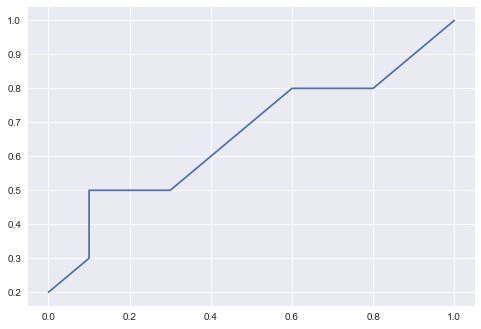

In [163]:
plt.plot(neg, pos)
plt.show()
plt.close()

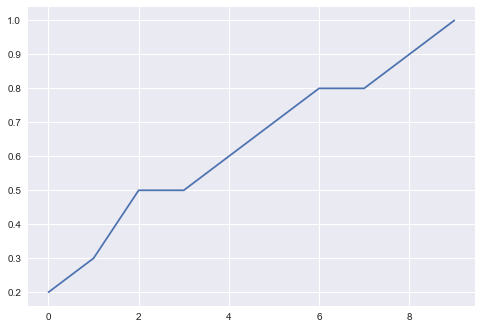

In [164]:
plt.plot(pos)
plt.show()
plt.close()